## Setting Up the Environment

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"himanshikhatri","key":"0f4391d58f05cade24e72c0e00a1f1f7"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 69 Dec 12 01:12 kaggle.json
{"username":"souryajammula","key":"e371234f3ae220dc48e94580bc67b347"}

In [ ]:
!sudo apt-get install python-lxml

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-lxml is already the newest version (4.2.1-1ubuntu0.6).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle datasets download -d moltean/fruits

fruits.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip fruits.zip

Archive:  fruits.zip
replace fruits-360-original-size/fruits-360-original-size/Meta/apple_6/info.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace fruits-360-original-size/fruits-360-original-size/Meta/apple_braeburn_1/info.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
print("Keras Version: ", tf.keras.__version__)

Keras Version:  2.9.0


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
train_dir = '/content/fruits-360_dataset/fruits-360/Training'

In [ ]:
test_dir = '/content/fruits-360_dataset/fruits-360/Test'

# load these images off disk using image_dataset_from_directory
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory
Old solution: Use ImageDataGenerator to rescale the images: https://keras.io/preprocessing/image/

In [ ]:
base_dir = '/'
print(base_dir)

/


In [ ]:
batch_size = 32
img_height = 128 #180
img_width = 128 #180

In [ ]:
# Establishes a Pipe line instead of loading the dataset directly
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 67692 files belonging to 131 classes.
Using 54154 files for training.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 67692 files belonging to 131 classes.
Using 13538 files for validation.


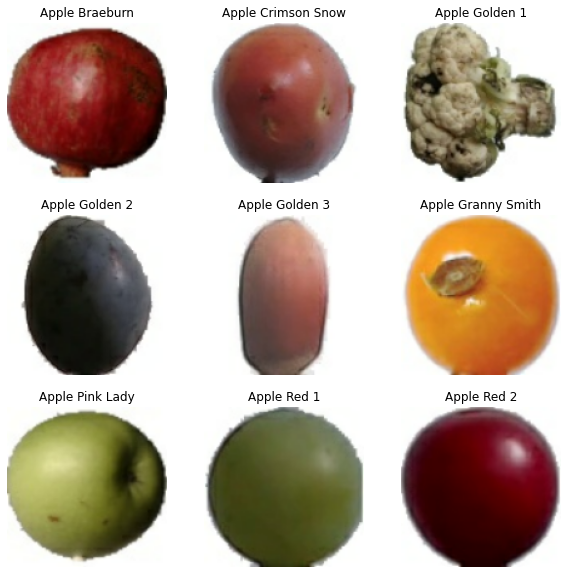

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, groundlabels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[i])
    plt.axis("off")

In [ ]:
#manually iterate over the dataset and retrieve batches of images:
#This is a batch of 32 images of shape 180x180x3 (the last dimension referes to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [ ]:
# number of batches
train_ds.cardinality().numpy()

1693

In [ ]:
batch_size = 32
img_height = 128
img_width = 128
IMG_SIZE = (img_height, img_width)
IMG_SHAPE = IMG_SIZE + (3,)
num_classes = 131

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
def getModel(base_model,preprocess_input):
    batch_size = 32
    img_height = 128
    img_width = 128
    IMG_SIZE = (img_height, img_width)
    IMG_SHAPE = IMG_SIZE + (3,)
    num_classes = 131
    
    data_augmentation = tf.keras.Sequential([
      tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
      tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    ])
    

    base_model.trainable = False
    
    header = tf.keras.Sequential([
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(num_classes, activation='softmax', dtype=tf.float32) 
    ])
    
    inputs = tf.keras.Input(shape=IMG_SHAPE)
    x = data_augmentation(inputs)
    x = preprocess_input(x)
    x = base_model(x, training=False)
    outputs = header(x)
    model = tf.keras.Model(inputs, outputs)
    base_learning_rate = 0.0001
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model

In [ ]:
def getFineTuneModel(model,fine_tune_at):
  model_base=model.layers[2]
  for layer in model.layers[2].layers[fine_tune_at:]:
    layer.trainable =  True
  base_learning_rate = 0.0001
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate/10),
          #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
          loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy'])
  return model

In [ ]:
def plot_history(history, metric, val_metric):
  acc = history.history[metric]
  val_acc = history.history[val_metric]
  loss=history.history['loss']
  val_loss=history.history['val_loss']
  epochs_range = range(len(acc))
  fig=plt.figure(figsize=(12, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylim([min(plt.ylim()),1])
  plt.grid(True)
  plt.title('Training and Validation Accuracy')
  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.grid(True)
  plt.title('Training and Validation Loss')
  plt.show()
  fig.savefig('traininghistory.pdf')
# plot_history('history','accuracy','val_accuracy')

In [ ]:
def plotHistoryFinetune(history,history_finetune,initial_epochs):
  acc = history.history['accuracy']
  acc += history_finetune.history['accuracy']

  val_acc = history.history['val_accuracy']
  val_acc += history_finetune.history['val_accuracy']

  loss = history.history['loss']
  loss += history_finetune.history['loss']

  val_loss = history.history['val_loss']
  val_loss += history_finetune.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.ylim([0.8, 1])
  plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.ylim([0, 1.0])
  plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()


In [ ]:
def trainTLModel(base_model,preprocess_input,fine_tune_at,train_ds,val_ds):
  model = getModel(base_model,preprocess_input)
  newModel = model
  fineTuneModel = getFineTuneModel(newModel,fine_tune_at)
  # Transfer Learning:
  #loss0, accuracy0 = model.evaluate(val_ds)
  history = model.fit(train_ds,
                    epochs=15,
                    validation_data=val_ds)
  #Fine Tuning
  #loss1, accuracy1 = fineTuneModel.evaluate(val_ds)
  fine_tune_epochs = 15
  initial_epochs = 15
  total_epochs =  initial_epochs + fine_tune_epochs
  history_finetune = fineTuneModel.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds)
  plotHistoryFinetune(history,history_finetune,initial_epochs)
  return [history,history_finetune,model,fineTuneModel]


In [ ]:
efficientnet_v2_model = tf.keras.applications.efficientnet_v2.EfficientNetV2L(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
preprocess_input =  tf.keras.applications.efficientnet_v2.preprocess_input



In [ ]:
efficientnet_v2_model.summary()

Model: "efficientnetv2-l"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 128, 128, 3)  0           ['input_4[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 64, 64, 32)   864         ['rescaling_1[0][0]']            
                                                                                                  
 stem_bn (BatchNormalization)   (None, 64, 64, 32)   128         ['stem_conv[0][0]'

In [ ]:
efficientnet_v2_tl_model = getModel(efficientnet_v2_model,preprocess_input)

In [ ]:
efficientnet_v2_tl_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 efficientnetv2-l (Functiona  (None, 4, 4, 1280)       117746848 
 l)                                                              
                                                                 
 sequential_7 (Sequential)   (None, 131)               167811    
                                                                 
Total params: 117,914,659
Trainable params: 167,811
Non-trainable params: 117,746,848
_________________________________________________________________


Epoch 1/15


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1693/1693 [==============================] - 168s 87ms/step - loss: 4.6378 - accuracy: 0.0718 - val_loss: 4.3528 - val_accuracy: 0.1994
Epoch 2/15
1693/1693 [==============================] - 135s 80ms/step - loss: 4.0369 - accuracy: 0.3152 - val_loss: 3.8329 - val_accuracy: 0.4051
Epoch 3/15
1693/1693 [==============================] - 136s 80ms/step - loss: 3.5146 - accuracy: 0.4731 - val_loss: 3.3809 - val_accuracy: 0.5166
Epoch 4/15
1693/1693 [==============================] - 137s 81ms/step - loss: 3.0693 - accuracy: 0.5585 - val_loss: 2.9931 - val_accuracy: 0.5875
Epoch 5/15
1693/1693 [==============================] - 135s 80ms/step - loss: 2.6903 - accuracy: 0.6191 - val_loss: 2.6651 - val_accuracy: 0.6369
Epoch 6/15
1693/1693 [==============================] - 135s 80ms/step - loss: 2.3732 - accuracy: 0.6676 - val_loss: 2.3878 - val_accuracy: 0.6765
Epoch 7/15
1693/1693 [==============================] - 135s 80ms/step - loss: 2.1102 - accuracy: 0.7068 - val_loss: 2.1535 - val

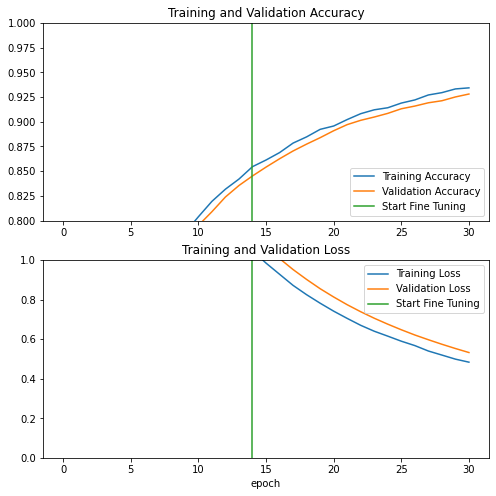

In [ ]:
[history,history_finetune,tl_model,fineTuneModel] = trainTLModel(efficientnet_v2_model,preprocess_input,100,train_ds,val_ds)

In [ ]:
# https://stackoverflow.com/questions/41061457/keras-how-to-save-the-training-history-attribute-of-the-history-object

In [ ]:
# [history_finetune,tl_model,fineTuneModel]

In [ ]:
import numpy as np
np.save('resnet_finetunehistory.npy',history_finetune.history)
np.save('resnet_tl_history.npy',history.history)

In [ ]:
# history=np.load('my_history.npy',allow_pickle='TRUE').item()

In [ ]:
fineTuneModel.save('saved_models/efficientnet_v2_finetune/', save_format='tf')

In [ ]:
tl_model.save('saved_models/efficientnet_v2_transferlearning/', save_format='tf')

In [ ]:
!ls

 fruits-360_dataset	   'kaggle (2).json'		 sample_data
 fruits-360-original-size   kaggle.json			 saved_models
 fruits.zip		    resnet_finetunehistory.npy
'kaggle (1).json'	    resnet_tl_history.npy


In [ ]:
!zip efficientNet_finetune.zip -r ./saved_models

  adding: saved_models/ (stored 0%)
  adding: saved_models/efficientnet_v2_transferlearning/ (stored 0%)
  adding: saved_models/efficientnet_v2_transferlearning/assets/ (stored 0%)
  adding: saved_models/efficientnet_v2_transferlearning/keras_metadata.pb (deflated 96%)
  adding: saved_models/efficientnet_v2_transferlearning/variables/ (stored 0%)
  adding: saved_models/efficientnet_v2_transferlearning/variables/variables.index (deflated 78%)
  adding: saved_models/efficientnet_v2_transferlearning/variables/variables.data-00000-of-00001 (deflated 11%)
  adding: saved_models/efficientnet_v2_transferlearning/saved_model.pb (deflated 92%)
  adding: saved_models/efficientnet_v2_finetune/ (stored 0%)
  adding: saved_models/efficientnet_v2_finetune/assets/ (stored 0%)
  adding: saved_models/efficientnet_v2_finetune/keras_metadata.pb (deflated 96%)
  adding: saved_models/efficientnet_v2_finetune/variables/ (stored 0%)
  adding: saved_models/efficientnet_v2_finetune/variables/variables.index (d

In [ ]:
from google.colab import files
files.download('efficientNet_finetune.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>